<a href="https://colab.research.google.com/github/KarlaLutz/Trabalho_Cripto_Turma9_BigData_FGV/blob/main/Tratamento_de_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalando o pacote requests, responsável por chamar a API**

In [ ]:
pip install requests

In [ ]:
import pandas as pd
import numpy as np
import requests
import json
import math
import io
import statsmodels.api as sm
import pickle
from simple_robot import feature_eng
import datetime

import matplotlib.pyplot as plt
from matplotlib import rcParams
from pylab import rcParams

import seaborn as sb
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [ ]:
def buscar_dados(moeda='BTC'):
   
    url = "https://api.lunarcrush.com/v2?data=assets&key=qc53fwv86ympdmcwqzb7ml&symbol="+moeda+"&data_points=720&interval=hour&start=1575158400&end=1577836799"
    request = requests.get(url)
    retorno = request.content 
    data = json.loads(retorno)
    print(data)
   
    global url_shares_calc_24h_previous
    global percent_change_24h
    global percent_change_7d
    global percent_change_30d
    global volume_24h
    global social_contributors_calc_24h_previous
    global tweet_spam_calc_24h_previous
    global news_calc_24h_previous
    global average_sentiment_calc_24h_previous
    global social_score_calc_24h_previous
    global social_volume_calc_24h_previous
    global alt_rank_30d_calc_24h_previous
    global alt_rank_calc_24h_previous
    global social_contributors_calc_24h
    global url_shares
    global unique_url_shares
    global reddit_posts
    global reddit_posts_score
    global reddit_comments
    global reddit_comments_score
    global tweets
    global tweet_spam
    global tweet_followers
    global tweet_quotes
    global tweet_retweets
    global tweet_replies
    global tweet_favorites
    global tweet_sentiment1
    global tweet_sentiment2
    global tweet_sentiment3
    global tweet_sentiment4
    global tweet_sentiment5
    global news
    #global medium
    #global youtube

    percent_change_24h = data['data'][0]['percent_change_24h']
    percent_change_7d = data['data'][0]['percent_change_7d']
    percent_change_30d = data['data'][0]['percent_change_30d']
    volume_24h = data['data'][0]['volume_24h']
    social_contributors_calc_24h_previous = data['data'][0]['social_contributors_calc_24h_previous']
    url_shares_calc_24h_previous = data['data'][0]['url_shares_calc_24h_previous']
    tweet_spam_calc_24h_previous = data['data'][0]['tweet_spam_calc_24h_previous']
    news_calc_24h_previous = data['data'][0]['news_calc_24h_previous']
    average_sentiment_calc_24h_previous = data['data'][0]['average_sentiment_calc_24h_previous']
    social_score_calc_24h_previous = data['data'][0]['social_score_calc_24h_previous']
    social_volume_calc_24h_previous = data['data'][0]['social_volume_calc_24h_previous']
    alt_rank_30d_calc_24h_previous = data['data'][0]['alt_rank_30d_calc_24h_previous']
    alt_rank_calc_24h_previous = data['data'][0]['alt_rank_calc_24h_previous']
    social_contributors_calc_24h = data['data'][0]['social_contributors_calc_24h']
    url_shares = data['data'][0]['url_shares']
    unique_url_shares = data['data'][0]['unique_url_shares']
    reddit_posts = data['data'][0]['reddit_posts']
    reddit_posts_score = data['data'][0]['reddit_posts_score']
    reddit_comments = data['data'][0]['reddit_comments']
    reddit_comments_score = data['data'][0]['reddit_comments_score']
    tweets = data['data'][0]['tweets']
    tweet_spam = data['data'][0]['tweet_spam']
    tweet_followers = data['data'][0]['tweet_followers']
    tweet_quotes = data['data'][0]['tweet_quotes']
    tweet_retweets = data['data'][0]['tweet_retweets']
    tweet_replies = data['data'][0]['tweet_replies']
    tweet_favorites = data['data'][0]['tweet_favorites']
    tweet_sentiment1 = data['data'][0]['tweet_sentiment1']
    tweet_sentiment2 = data['data'][0]['tweet_sentiment2']
    tweet_sentiment3 = data['data'][0]['tweet_sentiment3']
    tweet_sentiment4 = data['data'][0]['tweet_sentiment4']
    tweet_sentiment5 = data['data'][0]['tweet_sentiment5']
    news = data['data'][0]['news']

# **Função responsável por realizar a chamada da API, retornando as informações**

In [ ]:
buscar_dados()

KeyboardInterrupt: ignored

In [ ]:
#print(social_contributors_calc_24h)
print(tweet_followers)

# **Gerando a lista de timestamps disponiveis na base de teste**

In [ ]:
from datetime import datetime

ts = pd.DataFrame(pd.date_range(start="2019-07-05",end="2021-07-24",freq="60min").astype(np.int64) // 10 ** 9)

**Função para realização de iteração na chamada da API para todas as horas "cheias" do intervalo existente no DataFrame. Posteriormente, o resultado foi salvo num CSV e armazenado no GitHub** (https://raw.githubusercontent.com/xirusmore/MBA/master/btc_social_02.csv")

In [ ]:
import logging
from pandas.io.json import json_normalize
logger = logging.getLogger(__name__)

for ind in ts.index:
     timestamp = str(ts[0][ind])
     url = "https://api.lunarcrush.com/v2?data=assets&key=qc53fwv86ympdmcwqzb7ml&symbol=BTC&data_points=720&interval=hour&start="+timestamp+"&end="+timestamp
     request = requests.get(url)
     retorno = request.content 
     data = json.loads(retorno)
  
     try:
        json_object = json.dumps(data['data'][0]['timeSeries'][0], indent = 4) 
        
        try:
           df
        except NameError:
           df_exists = False
        else:
           df_exists = True

        if not df_exists:
            df = json_normalize(data['data'][0]['timeSeries'])
        else:
            df2 = json_normalize(data['data'][0]['timeSeries'])
            df = pd.concat([df, df2], ignore_index = True, axis = 0)
     except KeyError as e:
      # this will log the full error message and traceback
        logger.exception("erro no timestamp", timestamp) 
        continue

In [ ]:
#url = "https://api.lunarcrush.com/v2?data=assets&key=qc53fwv86ympdmcwqzb7ml&symbol=BTC&data_points=720&interval=hour&start=1562284800&end=1562284800"
#request = requests.get(url)
#retorno = request.content 
#data = json.loads(retorno)
#json_object = json.dumps(data['data'][0]['timeSeries'][0], indent = 4) 
#from pandas.io.json import json_normalize
#df = json_normalize(data['data'][0]['timeSeries'])

# **Analises de Variáveis do DataFrame retirado da API Online**

In [ ]:
url="https://raw.githubusercontent.com/xirusmore/MBA/master/btc_social_02.csv"
s=requests.get(url).content
df_btc=pd.read_csv(io.StringIO(s.decode('utf-8')), sep=';', decimal='.')

In [ ]:
df_btc.head()

,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,market_cap_global,market_dominance
0,1,1567468800,10406.81,10625.10,10773.27,10296.30,NaN,1.910000e+11,74.0,74.0,12.0,69.0,36.0,170.0,41402.0,4413.0,NaN,NaN,NaN,NaN,NaN,1837.0,3112.0,6798.0,23186.0,2055.0,36752522.0,21825007.0,50415744.0,193422913.0,18600351.0,321030863.0,3.6,NaN,NaN,53.0,314.0,1.0,2.0,4.0,53.0,0.740612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41838,1,NaN,NaN,NaN,NaN
1,1,1567555200,10589.31,10585.20,10827.14,10392.88,NaN,1.900000e+11,65.0,65.0,9.0,90.0,38.0,102.0,36533.0,4053.0,NaN,NaN,NaN,NaN,NaN,1706.0,2686.0,6784.0,19516.0,1788.0,27579525.0,24287817.0,59267151.0,139490090.0,13762747.0,264399710.0,3.5,NaN,NaN,53.0,280.0,1.0,2.0,5.0,57.5,0.528566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36925,1,NaN,NaN,NaN,NaN
2,1,1567641600,10534.67,10556.16,10659.60,10475.88,NaN,1.900000e+11,59.0,59.0,9.0,105.0,33.0,120.0,36489.0,3544.0,NaN,NaN,NaN,NaN,NaN,1566.0,2653.0,6810.0,20120.0,1796.0,7970967.0,12998972.0,55743080.0,147163614.0,13180288.0,237067039.0,3.5,NaN,NaN,51.0,250.0,1.0,4.0,5.0,67.5,0.178502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36840,1,NaN,NaN,NaN,NaN
3,1,1567728000,10564.49,10309.91,10938.39,10228.17,NaN,1.860000e+11,67.0,67.0,7.0,18.0,47.0,200.0,39406.0,3587.0,NaN,NaN,NaN,NaN,NaN,1970.0,2808.0,7385.0,21555.0,2101.0,6142248.0,25172342.0,40381925.0,158676849.0,17997002.0,248382031.0,3.5,NaN,NaN,52.0,244.0,3.1,4.0,5.0,78.0,0.212571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39771,1,NaN,NaN,NaN,NaN
4,1,1567814400,10340.02,10491.96,10574.99,10331.88,NaN,1.880000e+11,44.0,44.0,4.0,13.0,37.0,136.0,30199.0,3848.0,NaN,NaN,NaN,NaN,NaN,1184.0,2189.0,5811.0,15538.0,1629.0,8514505.0,13963143.0,33175351.0,102901931.0,13110198.0,171672628.0,3.5,NaN,NaN,48.0,1.0,5.0,4.0,5.0,87.5,0.367695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30285,1,NaN,NaN,NaN,NaN


In [ ]:
list(df_btc.columns)

['asset_id',
 'time',
 'open',
 'close',
 'high',
 'low',
 'volume',
 'market_cap',
 'url_shares',
 'unique_url_shares',
 'reddit_posts',
 'reddit_posts_score',
 'reddit_comments',
 'reddit_comments_score',
 'tweets',
 'tweet_spam',
 'tweet_followers',
 'tweet_quotes',
 'tweet_retweets',
 'tweet_replies',
 'tweet_favorites',
 'tweet_sentiment1',
 'tweet_sentiment2',
 'tweet_sentiment3',
 'tweet_sentiment4',
 'tweet_sentiment5',
 'tweet_sentiment_impact1',
 'tweet_sentiment_impact2',
 'tweet_sentiment_impact3',
 'tweet_sentiment_impact4',
 'tweet_sentiment_impact5',
 'social_score',
 'average_sentiment',
 'sentiment_absolute',
 'sentiment_relative',
 'search_average',
 'news',
 'price_score',
 'social_impact_score',
 'correlation_rank',
 'galaxy_score',
 'volatility',
 'alt_rank',
 'alt_rank_30d',
 'market_cap_rank',
 'percent_change_24h_rank',
 'volume_24h_rank',
 'social_volume_24h_rank',
 'social_score_24h_rank',
 'medium',
 'youtube',
 'social_contributors',
 'social_volume',
 'pric

In [ ]:
# Verificando o tipo das variáveis

df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 58 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   asset_id                 16426 non-null  int64  
 1   time                     16426 non-null  int64  
 2   open                     16426 non-null  float64
 3   close                    16426 non-null  float64
 4   high                     16426 non-null  float64
 5   low                      16426 non-null  float64
 6   volume                   16416 non-null  float64
 7   market_cap               15833 non-null  float64
 8   url_shares               16365 non-null  float64
 9   unique_url_shares        16365 non-null  float64
 10  reddit_posts             16397 non-null  float64
 11  reddit_posts_score       16397 non-null  float64
 12  reddit_comments          16399 non-null  float64
 13  reddit_comments_score    16399 non-null  float64
 14  tweets                

In [ ]:
# Calculando a média

df_btc.mean()

asset_id                   1.000000e+00
time                       1.597511e+09
open                       2.056766e+04
close                      2.056508e+04
high                       2.064799e+04
low                        2.047837e+04
volume                     1.526661e+09
market_cap                 3.769855e+11
url_shares                 1.439118e+03
unique_url_shares          8.279353e+02
reddit_posts               5.404787e+01
reddit_posts_score         3.832954e+02
reddit_comments            9.553369e+01
reddit_comments_score      4.285888e+02
tweets                     6.299110e+03
tweet_spam                 2.059642e+03
tweet_followers            3.156028e+07
tweet_quotes               2.011301e+02
tweet_retweets             2.091932e+03
tweet_replies              9.111313e+02
tweet_favorites            8.916990e+03
tweet_sentiment1           2.030397e+02
tweet_sentiment2           6.053480e+02
tweet_sentiment3           8.148970e+02
tweet_sentiment4           4.376692e+03


In [ ]:
# Verificando missing values

df_btc.isnull().sum()

asset_id                       0
time                           0
open                           0
close                          0
high                           0
low                            0
volume                        10
market_cap                   593
url_shares                    61
unique_url_shares             61
reddit_posts                  29
reddit_posts_score            29
reddit_comments               27
reddit_comments_score         27
tweets                        48
tweet_spam                    48
tweet_followers               56
tweet_quotes                  56
tweet_retweets                56
tweet_replies                 56
tweet_favorites               56
tweet_sentiment1              48
tweet_sentiment2              48
tweet_sentiment3              48
tweet_sentiment4              48
tweet_sentiment5              48
tweet_sentiment_impact1       48
tweet_sentiment_impact2       48
tweet_sentiment_impact3       48
tweet_sentiment_impact4       48
tweet_sent

In [ ]:
# Retirando os missings de Market Cap

df_btc2 = df_btc[~df_btc['market_cap'].isnull()]
df_btc2.isnull().sum()

asset_id                       0
time                           0
open                           0
close                          0
high                           0
low                            0
volume                        10
market_cap                     0
url_shares                    10
unique_url_shares             10
reddit_posts                  29
reddit_posts_score            29
reddit_comments               27
reddit_comments_score         27
tweets                         0
tweet_spam                     0
tweet_followers                8
tweet_quotes                   8
tweet_retweets                 8
tweet_replies                  8
tweet_favorites                8
tweet_sentiment1               0
tweet_sentiment2               0
tweet_sentiment3               0
tweet_sentiment4               0
tweet_sentiment5               0
tweet_sentiment_impact1        0
tweet_sentiment_impact2        0
tweet_sentiment_impact3        0
tweet_sentiment_impact4        0
tweet_sent

In [ ]:
# Retirando as colunas "search avergae", "medium", "youtube" e "social contributors" devido aos missing values

df_btc2 = df_btc2.drop(['asset_id', 'search_average', 'medium', 'youtube', 'social_contributors'], axis=1)
df_btc2.isnull().sum()

time                         0
open                         0
close                        0
high                         0
low                          0
volume                      10
market_cap                   0
url_shares                  10
unique_url_shares           10
reddit_posts                29
reddit_posts_score          29
reddit_comments             27
reddit_comments_score       27
tweets                       0
tweet_spam                   0
tweet_followers              8
tweet_quotes                 8
tweet_retweets               8
tweet_replies                8
tweet_favorites              8
tweet_sentiment1             0
tweet_sentiment2             0
tweet_sentiment3             0
tweet_sentiment4             0
tweet_sentiment5             0
tweet_sentiment_impact1      0
tweet_sentiment_impact2      0
tweet_sentiment_impact3      0
tweet_sentiment_impact4      0
tweet_sentiment_impact5      0
social_score                 0
average_sentiment            0
sentimen

In [ ]:
# Substituindo os NA's por Zero

df_btc2=df_btc2.replace(np.nan, 0)
df_btc2.isnull().sum()

time                       0
open                       0
close                      0
high                       0
low                        0
volume                     0
market_cap                 0
url_shares                 0
unique_url_shares          0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
sentiment_absolute         0
sentiment_relative         0
news          

In [ ]:
open = df_btc['open']
close = df_btc['close']
tweets = df_btc['tweets']
tw_ret = df_btc['tweet_retweets']
ave_sent = df_btc['average_sentiment']
volume = df_btc['volume']
mk_cap = df_btc['market_cap']
p_sc = df_btc['price_score']
s_sc = df_btc['social_score']
g_sc = df_btc['galaxy_score']

# **Plot dos Resultados**

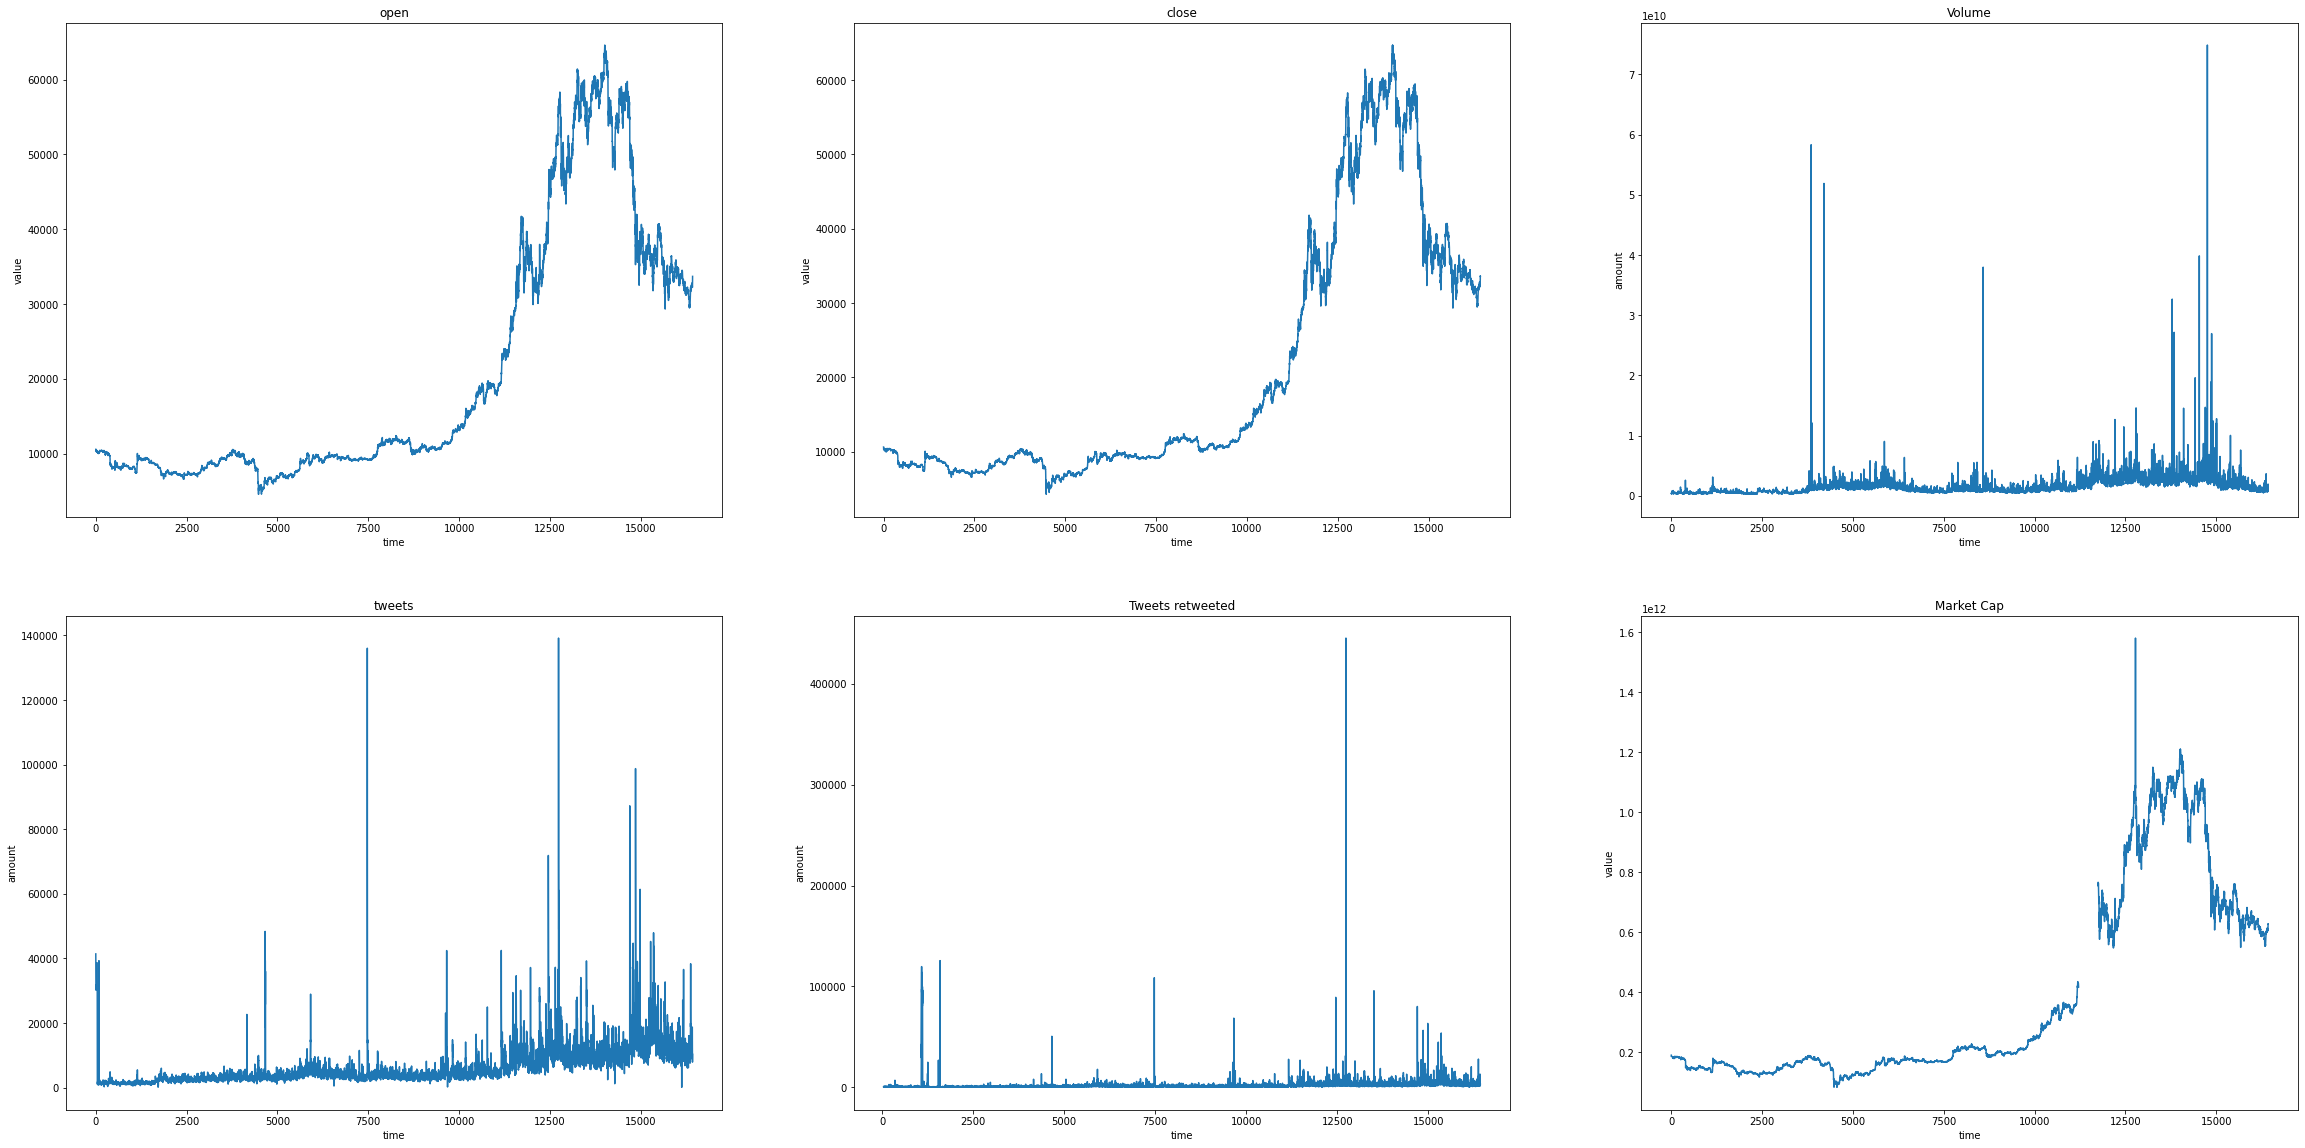

In [ ]:
# Realizando o plot de cruzamento de variáveis com a Close.

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(40, 20))

plt.subplot(2, 3, 1)
open.plot()
plt.title('open')
plt.xlabel('time')
plt.ylabel('value')


plt.subplot(2, 3, 2)
close.plot()
plt.title('close')
plt.xlabel('time')
plt.ylabel('value')


plt.subplot(2, 3, 3)
volume.plot()
plt.title('Volume')
plt.xlabel('time')
plt.ylabel('amount')


plt.subplot(2, 3, 4)
tweets.plot()
plt.title('tweets')
plt.xlabel('time')
plt.ylabel('amount')


plt.subplot(2, 3, 5)
tw_ret.plot()
plt.title('Tweets retweeted')
plt.xlabel('time')
plt.ylabel('amount')


plt.subplot(2, 3, 6)
mk_cap.plot()
plt.title('Market Cap')
plt.xlabel('time')
plt.ylabel('value')

plt.show()
#plt.tight_layout()

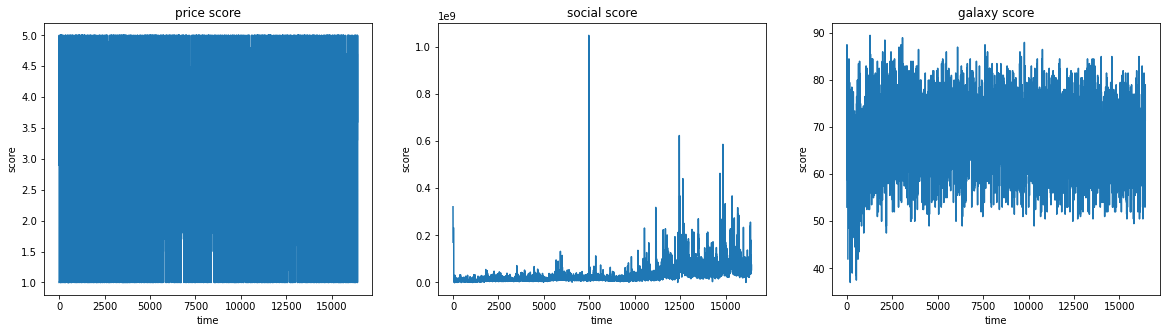

In [ ]:
fig2, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

plt.subplot(1, 3, 1)
p_sc.plot()
plt.title('price score')
plt.xlabel('time')
plt.ylabel('score')


plt.subplot(1, 3, 2)
s_sc.plot()
plt.title('social score')
plt.xlabel('time')
plt.ylabel('score')


plt.subplot(1, 3, 3)
g_sc.plot()
plt.title('galaxy score')
plt.xlabel('time')
plt.ylabel('score')

plt.show()

In [ ]:
# Descrição da variável resposta Close

print(df_btc[['close']].describe())
print(df_btc2[['close']].describe())

              close
count  16426.000000
mean   20565.078165
std    16882.640722
min     4267.292258
25%     8824.160809
50%    10651.789720
75%    33443.882863
max    64695.537830
              close
count  15833.000000
mean   20314.258143
std    17081.888496
min     4267.292258
25%     8763.970099
50%    10408.754970
75%    33516.594190
max    64695.537830


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


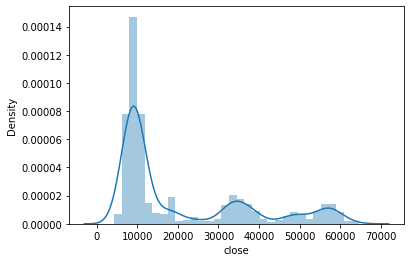

In [ ]:
# Analisando plots da Close cruzando com outras features

sb.distplot(close)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


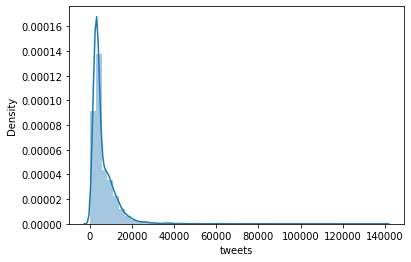

In [ ]:
sb.distplot(tweets)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


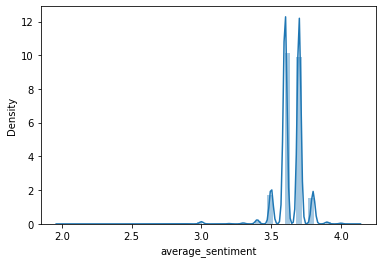

In [ ]:
sb.distplot(ave_sent)

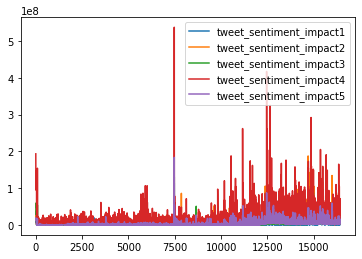

In [ ]:
# Analise do impacto dos Sentimentos

df1 = df_btc[['tweet_sentiment_impact1','tweet_sentiment_impact2','tweet_sentiment_impact3','tweet_sentiment_impact4','tweet_sentiment_impact5']]
df1.plot()

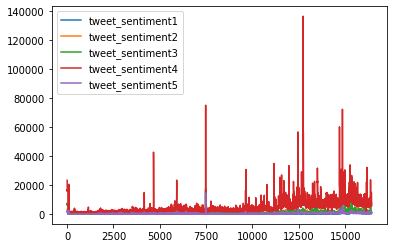

In [ ]:
# Analise dos Sentimentos

df2 = df_btc[['tweet_sentiment1','tweet_sentiment2','tweet_sentiment3','tweet_sentiment4','tweet_sentiment5']]
df2.plot()

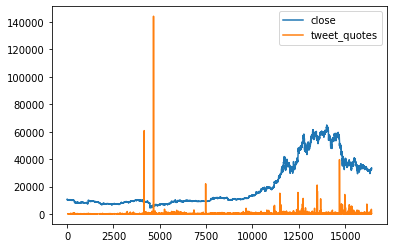

In [ ]:
# Analise dos tweets cruzando com Close

df3 = df_btc[['close', 'tweet_quotes']]
df3.plot()

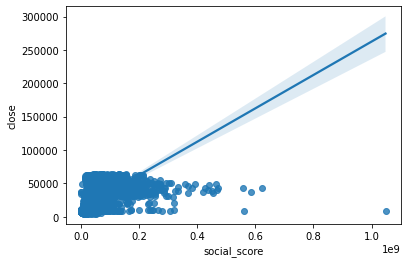

In [ ]:
# Analise dos de social_score cruzando com Close

sb.regplot(x = 'social_score', y = 'close', data = df_btc, scatter = True)

# **Analise de Correlação das Features do DataFrame retirado da API Online**

In [ ]:
# Analise do VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_btc2[[
 'time',
 'open',
 'close',
 'high',
 'low',
 'volume',
 'market_cap',
 'url_shares',
 'unique_url_shares',
 'reddit_posts',
 'reddit_posts_score',
 'reddit_comments',
 'reddit_comments_score',
 'tweets',
 'tweet_spam',
 'tweet_followers',
 'tweet_quotes',
 'tweet_retweets',
 'tweet_replies',
 'tweet_favorites',
 'tweet_sentiment1',
 'tweet_sentiment2',
 'tweet_sentiment3',
 'tweet_sentiment4',
 'tweet_sentiment5',
 'tweet_sentiment_impact1',
 'tweet_sentiment_impact2',
 'tweet_sentiment_impact3',
 'tweet_sentiment_impact4',
 'tweet_sentiment_impact5',
 'social_score',
 'average_sentiment',
 'sentiment_absolute',
 'sentiment_relative',
 'news',
 'price_score',
 'social_impact_score',
 'correlation_rank',
 'galaxy_score',
 'volatility',
 'alt_rank',
 'alt_rank_30d',
 'market_cap_rank',
 'percent_change_24h_rank',
 'volume_24h_rank',
 'social_volume_24h_rank',
 'social_score_24h_rank',
 'social_volume',
 'price_btc',
 'social_volume_global',
 'social_dominance',
 'market_cap_global',
 'market_dominance']]

In [ ]:
X.head()

,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,social_volume,price_btc,social_volume_global,social_dominance,market_cap_global,market_dominance
0,1567468800,10406.81,10625.10,10773.27,10296.30,0.0,1.910000e+11,74.0,74.0,12.0,69.0,36.0,170.0,41402.0,4413.0,0.0,0.0,0.0,0.0,0.0,1837.0,3112.0,6798.0,23186.0,2055.0,36752522.0,21825007.0,50415744.0,193422913.0,18600351.0,321030863.0,3.6,0.0,0.0,314.0,1.0,2.0,4.0,53.0,0.740612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41838,1,0.0,0.0,0.0,0.0
1,1567555200,10589.31,10585.20,10827.14,10392.88,0.0,1.900000e+11,65.0,65.0,9.0,90.0,38.0,102.0,36533.0,4053.0,0.0,0.0,0.0,0.0,0.0,1706.0,2686.0,6784.0,19516.0,1788.0,27579525.0,24287817.0,59267151.0,139490090.0,13762747.0,264399710.0,3.5,0.0,0.0,280.0,1.0,2.0,5.0,57.5,0.528566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36925,1,0.0,0.0,0.0,0.0
2,1567641600,10534.67,10556.16,10659.60,10475.88,0.0,1.900000e+11,59.0,59.0,9.0,105.0,33.0,120.0,36489.0,3544.0,0.0,0.0,0.0,0.0,0.0,1566.0,2653.0,6810.0,20120.0,1796.0,7970967.0,12998972.0,55743080.0,147163614.0,13180288.0,237067039.0,3.5,0.0,0.0,250.0,1.0,4.0,5.0,67.5,0.178502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36840,1,0.0,0.0,0.0,0.0
3,1567728000,10564.49,10309.91,10938.39,10228.17,0.0,1.860000e+11,67.0,67.0,7.0,18.0,47.0,200.0,39406.0,3587.0,0.0,0.0,0.0,0.0,0.0,1970.0,2808.0,7385.0,21555.0,2101.0,6142248.0,25172342.0,40381925.0,158676849.0,17997002.0,248382031.0,3.5,0.0,0.0,244.0,3.1,4.0,5.0,78.0,0.212571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39771,1,0.0,0.0,0.0,0.0
4,1567814400,10340.02,10491.96,10574.99,10331.88,0.0,1.880000e+11,44.0,44.0,4.0,13.0,37.0,136.0,30199.0,3848.0,0.0,0.0,0.0,0.0,0.0,1184.0,2189.0,5811.0,15538.0,1629.0,8514505.0,13963143.0,33175351.0,102901931.0,13110198.0,171672628.0,3.5,0.0,0.0,1.0,5.0,4.0,5.0,87.5,0.367695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30285,1,0.0,0.0,0.0,0.0


In [ ]:
# Verificando se há nulls

X.isnull().sum()

time                       0
open                       0
close                      0
high                       0
low                        0
volume                     0
market_cap                 0
url_shares                 0
unique_url_shares          0
reddit_posts               0
reddit_posts_score         0
reddit_comments            0
reddit_comments_score      0
tweets                     0
tweet_spam                 0
tweet_followers            0
tweet_quotes               0
tweet_retweets             0
tweet_replies              0
tweet_favorites            0
tweet_sentiment1           0
tweet_sentiment2           0
tweet_sentiment3           0
tweet_sentiment4           0
tweet_sentiment5           0
tweet_sentiment_impact1    0
tweet_sentiment_impact2    0
tweet_sentiment_impact3    0
tweet_sentiment_impact4    0
tweet_sentiment_impact5    0
social_score               0
average_sentiment          0
sentiment_absolute         0
sentiment_relative         0
news          

In [ ]:
# Criando um dataframe para armazenar os valores de VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# Calculando o VIF de cada feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                    feature           VIF
0                      time  1.032204e+01
1                      open  3.109793e+04
2                     close  3.856454e+04
3                      high  4.493674e+04
4                       low  2.681149e+04
5                    volume  1.421163e+00
6                market_cap  5.467868e+03
7                url_shares  7.234065e+00
8         unique_url_shares  3.348401e+13
9              reddit_posts  8.370925e+10
10       reddit_posts_score  1.253232e+00
11          reddit_comments  4.501574e+11
12    reddit_comments_score  1.072711e+00
13                   tweets           inf
14               tweet_spam  6.409697e+00
15          tweet_followers  6.726059e+02
16             tweet_quotes  1.919836e+00
17           tweet_retweets  1.470189e+00
18            tweet_replies  3.343874e+00
19          tweet_favorites  5.386162e+00
20         tweet_sentiment1  6.251334e+01
21         tweet_sentiment2  3.662846e+02
22         tweet_sentiment3  3.096

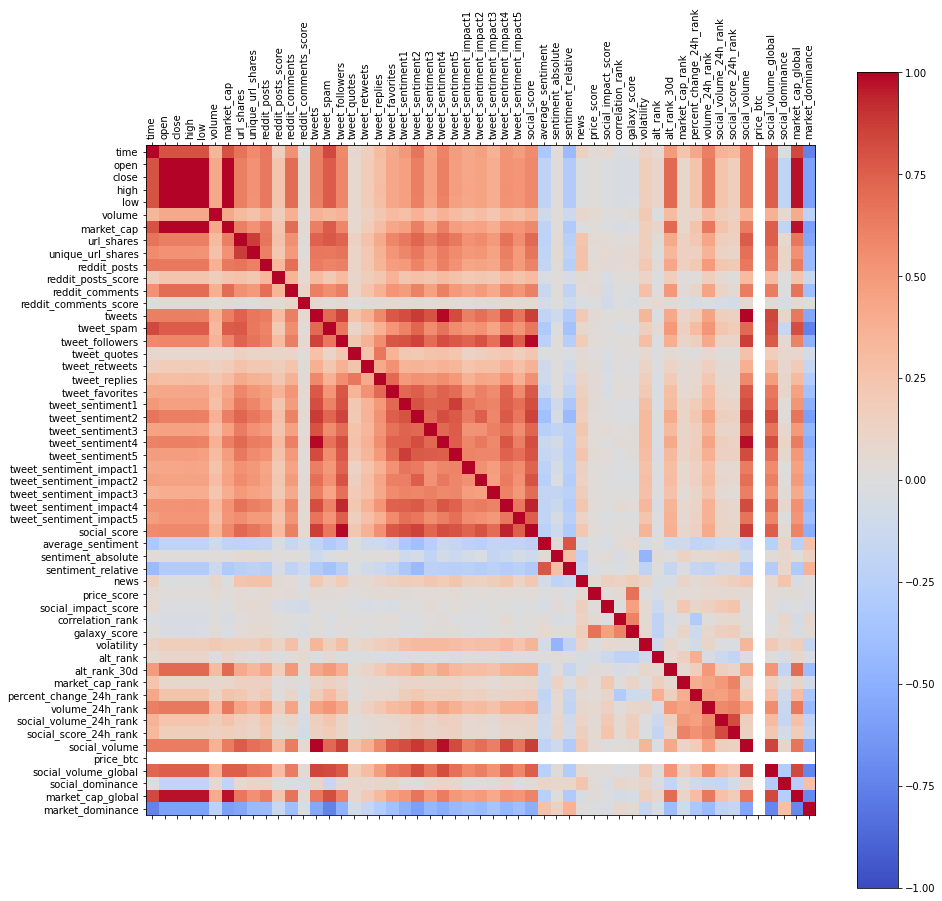

In [ ]:
# Gráfico de correlação por nível de cor

corr = X.corr()
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(X.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(X.columns)
ax.set_yticklabels(X.columns)
plt.show()

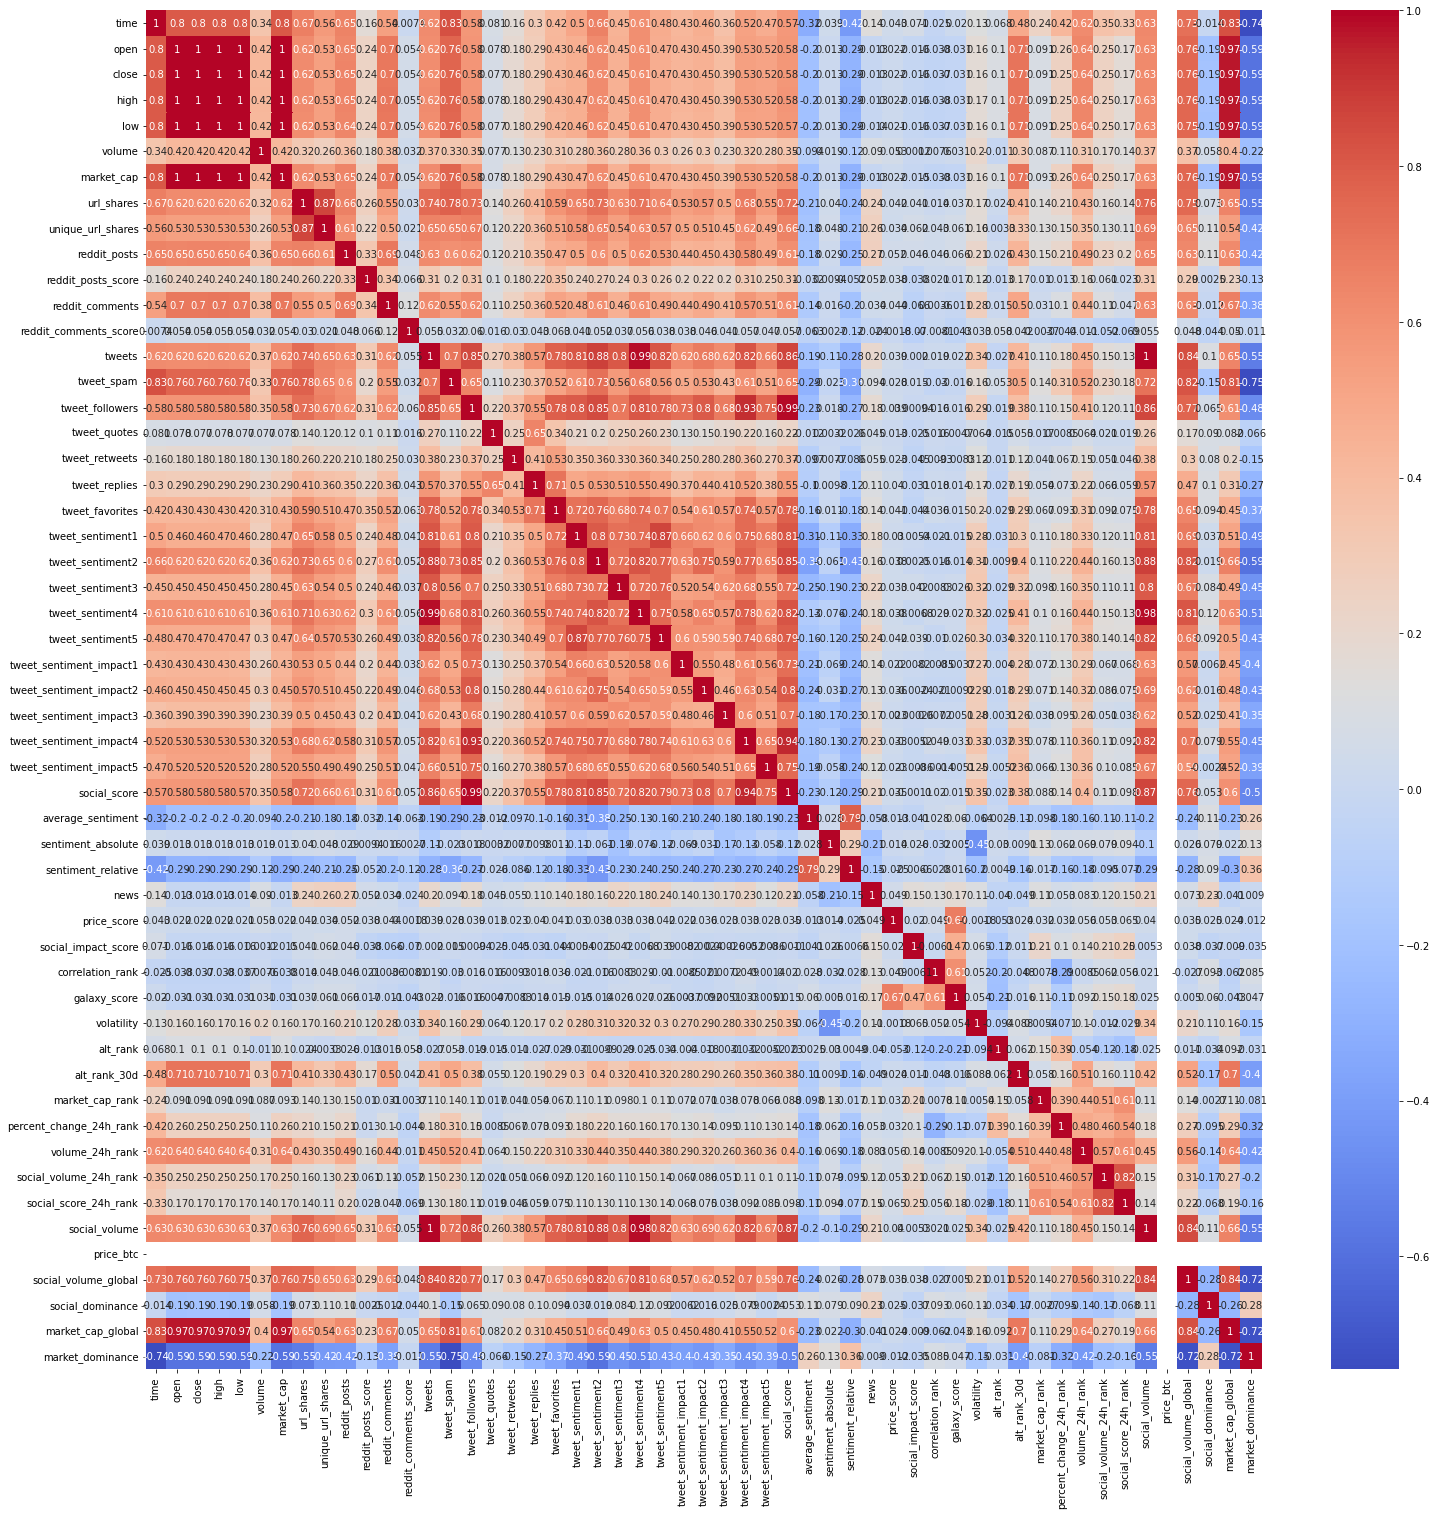

In [ ]:
# Adicionando as porcentagens de correlação de cada feature ao gráfico

fig = plt.figure(figsize=(25,25))
sns.heatmap(X.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

In [ ]:
# Criando um novo dataframe: Criação da matriz de correlação e identificação das features com correlação acima de 0,7
# Encontrando o index das colunas das features com correlação maior que 0.7

corrMatrix=X.corr().abs()
upperMatrix = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

corrFeatures = [column for column in upperMatrix.columns if any(upperMatrix[column] > 0.7)]

In [ ]:
corrFeatures

['open',
 'close',
 'high',
 'low',
 'market_cap',
 'unique_url_shares',
 'reddit_comments',
 'tweets',
 'tweet_spam',
 'tweet_followers',
 'tweet_favorites',
 'tweet_sentiment1',
 'tweet_sentiment2',
 'tweet_sentiment3',
 'tweet_sentiment4',
 'tweet_sentiment5',
 'tweet_sentiment_impact1',
 'tweet_sentiment_impact2',
 'tweet_sentiment_impact4',
 'tweet_sentiment_impact5',
 'social_score',
 'sentiment_relative',
 'alt_rank_30d',
 'social_score_24h_rank',
 'social_volume',
 'social_volume_global',
 'market_cap_global',
 'market_dominance']

In [ ]:
# Novo Dataframe de features

df_features = X.drop(columns=corrFeatures)

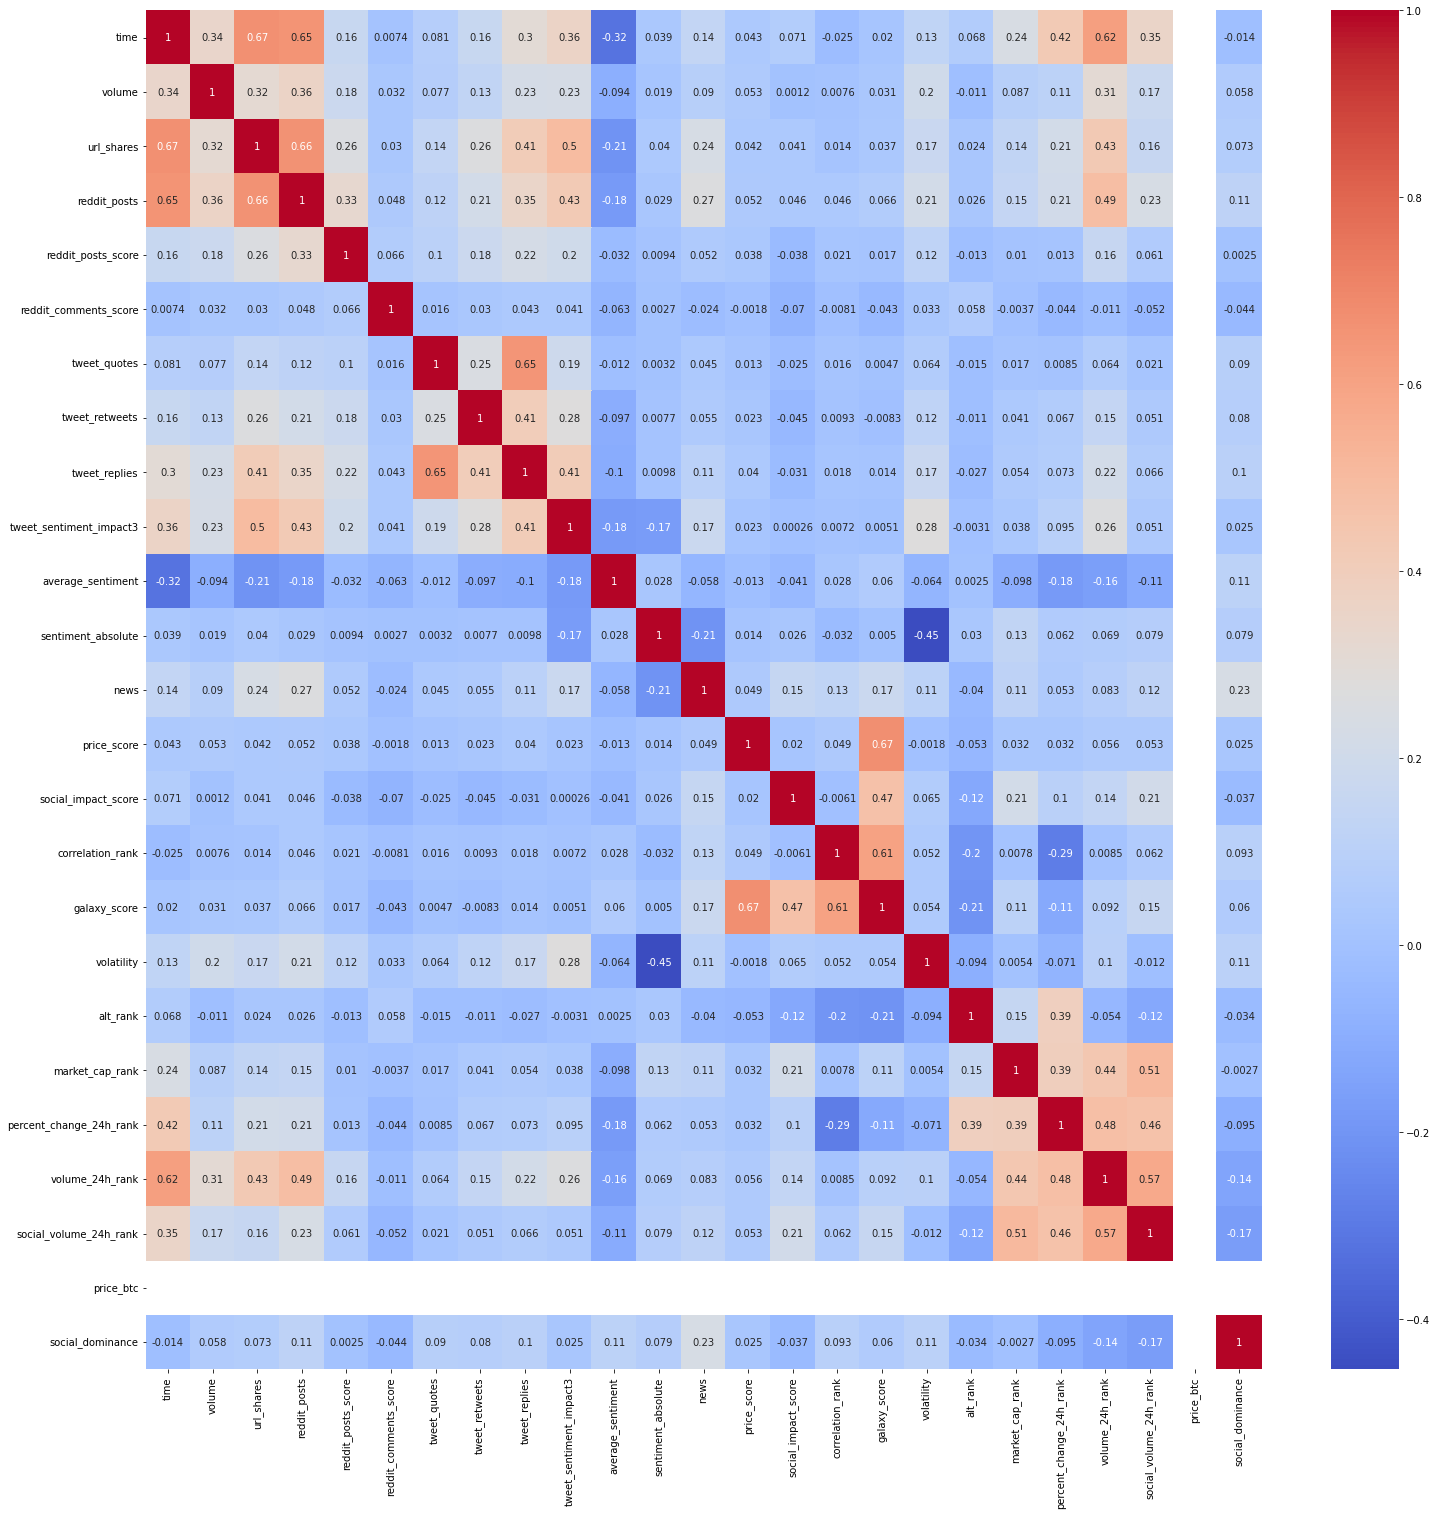

In [ ]:
# Averiguando as correlações das features restantes do novo DataFrame

fig2 = plt.figure(figsize=(25,25))
sns.heatmap(df_features.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()

In [ ]:
# Verificando a correlação do novo dataframe

# Verificando o VIF do novo dataframe
vif_data_new = pd.DataFrame()
vif_data_new["feature"] = df_features.columns
  
# Realizando o calculo do VIF para cada feature
vif_data_new["VIF"] = [variance_inflation_factor(df_features.values, i)
                          for i in range(len(df_features.columns))]
  
print(vif_data_new)

                    feature          VIF
0                      time     2.999756
1                    volume     1.252640
2                url_shares     2.551550
3              reddit_posts     2.501631
4        reddit_posts_score     1.179964
5     reddit_comments_score     1.030813
6              tweet_quotes     1.824647
7            tweet_retweets     1.248442
8             tweet_replies     2.443432
9   tweet_sentiment_impact3     1.583166
10        average_sentiment     8.405463
11       sentiment_absolute     1.507838
12                     news     1.318718
13              price_score   597.055632
14      social_impact_score   315.331065
15         correlation_rank   491.842921
16             galaxy_score  1470.167937
17               volatility     1.507091
18                 alt_rank     1.547096
19          market_cap_rank     1.654119
20  percent_change_24h_rank     2.296429
21          volume_24h_rank     2.585322
22   social_volume_24h_rank     2.138127
23              

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [ ]:
# Temos ainda as variáveis price_score, social_impact_score, correlation_rank e galaxy_score com a correlação alta

check = df_btc2[['price_score','social_impact_score', 'correlation_rank', 'galaxy_score']]

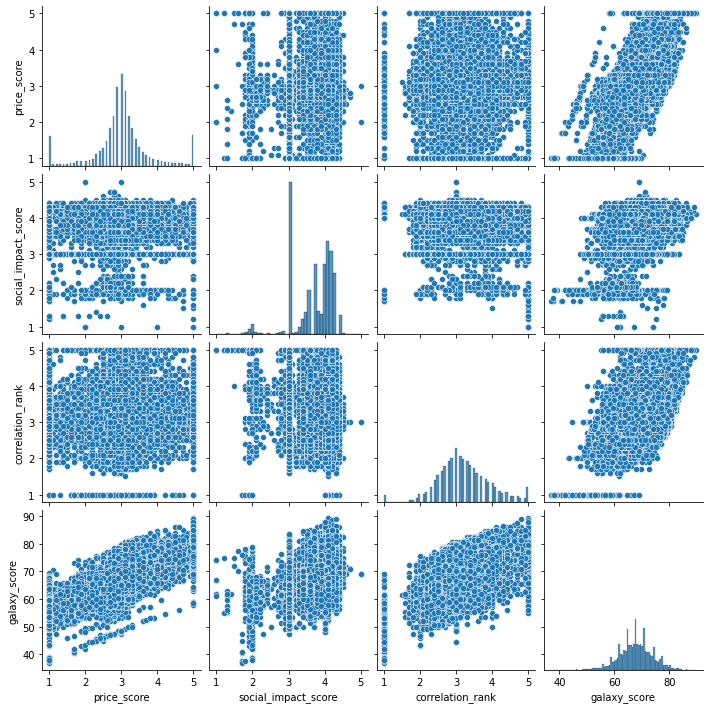

In [ ]:
# Vamos criar alguns plots para melhor analisar se precisamos retirar todas ou não.

sb.pairplot(check)

In [ ]:
# Vamos retirar galaxy score que é a mais alta e verificar novamente

df_features2 = df_features.drop(['galaxy_score'], axis=1)
df_features2.head()

,time,volume,url_shares,reddit_posts,reddit_posts_score,reddit_comments_score,tweet_quotes,tweet_retweets,tweet_replies,tweet_sentiment_impact3,average_sentiment,sentiment_absolute,news,price_score,social_impact_score,correlation_rank,volatility,alt_rank,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,price_btc,social_dominance
0,1567468800,0.0,74.0,12.0,69.0,170.0,0.0,0.0,0.0,50415744.0,3.6,0.0,314.0,1.0,2.0,4.0,0.740612,0.0,0.0,0.0,0.0,0.0,1,0.0
1,1567555200,0.0,65.0,9.0,90.0,102.0,0.0,0.0,0.0,59267151.0,3.5,0.0,280.0,1.0,2.0,5.0,0.528566,0.0,0.0,0.0,0.0,0.0,1,0.0
2,1567641600,0.0,59.0,9.0,105.0,120.0,0.0,0.0,0.0,55743080.0,3.5,0.0,250.0,1.0,4.0,5.0,0.178502,0.0,0.0,0.0,0.0,0.0,1,0.0
3,1567728000,0.0,67.0,7.0,18.0,200.0,0.0,0.0,0.0,40381925.0,3.5,0.0,244.0,3.1,4.0,5.0,0.212571,0.0,0.0,0.0,0.0,0.0,1,0.0
4,1567814400,0.0,44.0,4.0,13.0,136.0,0.0,0.0,0.0,33175351.0,3.5,0.0,1.0,5.0,4.0,5.0,0.367695,0.0,0.0,0.0,0.0,0.0,1,0.0


In [ ]:
# Verificando o VIF do dataframe sem a variável galaxy_score
vif_data_2 = pd.DataFrame()
vif_data_2["feature"] = df_features2.columns
  
# Realizando o calculo do VIF para cada feature
vif_data_2["VIF"] = [variance_inflation_factor(df_features2.values, i)
                          for i in range(len(df_features2.columns))]
  
print(vif_data_2)


# Agora temos um bom VIF para todas

                    feature       VIF
0                      time  2.989390
1                    volume  1.252615
2                url_shares  2.551451
3              reddit_posts  2.501540
4        reddit_posts_score  1.179956
5     reddit_comments_score  1.030315
6              tweet_quotes  1.824540
7            tweet_retweets  1.248127
8             tweet_replies  2.443368
9   tweet_sentiment_impact3  1.583160
10        average_sentiment  1.170120
11       sentiment_absolute  1.506182
12                     news  1.318693
13              price_score  1.014235
14      social_impact_score  1.133572
15         correlation_rank  1.191935
16               volatility  1.507090
17                 alt_rank  1.547096
18          market_cap_rank  1.629095
19  percent_change_24h_rank  2.296313
20          volume_24h_rank  2.585253
21   social_volume_24h_rank  2.137377
22                price_btc  0.000000
23         social_dominance  1.260606


/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


# **Realizando o Join do DataFrame de Bitcoin com o da API Online**

In [ ]:
# Realizaremos o join a partir do index de data presente em ambos os DataFrames
# Função para converter a hora da transação em hora cheia 

def add_hora_cheia (row):
   return pd.Timestamp(year = row.datetime.year,  
                     month = row.datetime.month, 
                     day = row.datetime.day, 
                     hour = row.datetime.hour, 
                     second = 0)

In [ ]:
# Importando os dados do dataframe com as features adicionais

import io
import requests

url="https://raw.githubusercontent.com/xirusmore/MBA/master/btc_social_02.csv"
s=requests.get(url).content
df_add=pd.read_csv(io.StringIO(s.decode('utf-8')), sep=';', decimal='.')

In [ ]:
df_add.head(10)

,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,market_cap_global,market_dominance
0,1,1567468800,10406.81000,10625.10000,10773.27000,10296.30000,NaN,1.910000e+11,74.0,74.0,12.0,69.0,36.0,170.0,41402.0,4413.0,NaN,NaN,NaN,NaN,NaN,1837.0,3112.0,6798.0,23186.0,2055.0,36752522.0,21825007.0,50415744.0,193422913.0,18600351.0,321030863.0,3.6,NaN,NaN,53.0,314.0,1.0,2.0,4.0,53.0,0.740612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41838,1,NaN,NaN,NaN,NaN
1,1,1567555200,10589.31000,10585.20000,10827.14000,10392.88000,NaN,1.900000e+11,65.0,65.0,9.0,90.0,38.0,102.0,36533.0,4053.0,NaN,NaN,NaN,NaN,NaN,1706.0,2686.0,6784.0,19516.0,1788.0,27579525.0,24287817.0,59267151.0,139490090.0,13762747.0,264399710.0,3.5,NaN,NaN,53.0,280.0,1.0,2.0,5.0,57.5,0.528566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36925,1,NaN,NaN,NaN,NaN
2,1,1567641600,10534.67000,10556.16000,10659.60000,10475.88000,NaN,1.900000e+11,59.0,59.0,9.0,105.0,33.0,120.0,36489.0,3544.0,NaN,NaN,NaN,NaN,NaN,1566.0,2653.0,6810.0,20120.0,1796.0,7970967.0,12998972.0,55743080.0,147163614.0,13180288.0,237067039.0,3.5,NaN,NaN,51.0,250.0,1.0,4.0,5.0,67.5,0.178502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36840,1,NaN,NaN,NaN,NaN
3,1,1567728000,10564.49000,10309.91000,10938.39000,10228.17000,NaN,1.860000e+11,67.0,67.0,7.0,18.0,47.0,200.0,39406.0,3587.0,NaN,NaN,NaN,NaN,NaN,1970.0,2808.0,7385.0,21555.0,2101.0,6142248.0,25172342.0,40381925.0,158676849.0,17997002.0,248382031.0,3.5,NaN,NaN,52.0,244.0,3.1,4.0,5.0,78.0,0.212571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39771,1,NaN,NaN,NaN,NaN
4,1,1567814400,10340.02000,10491.96000,10574.99000,10331.88000,NaN,1.880000e+11,44.0,44.0,4.0,13.0,37.0,136.0,30199.0,3848.0,NaN,NaN,NaN,NaN,NaN,1184.0,2189.0,5811.0,15538.0,1629.0,8514505.0,13963143.0,33175351.0,102901931.0,13110198.0,171672628.0,3.5,NaN,NaN,48.0,1.0,5.0,4.0,5.0,87.5,0.367695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30285,1,NaN,NaN,NaN,NaN
5,1,1567900800,10523.46000,10420.88000,10595.71000,10286.85000,NaN,1.870000e+11,40.0,40.0,4.0,36.0,29.0,104.0,31621.0,4514.0,NaN,NaN,NaN,NaN,NaN,1125.0,2005.0,5845.0,16628.0,1504.0,16150172.0,14695612.0,29639367.0,95616444.0,14494446.0,170604146.0,3.6,NaN,NaN,45.0,103.0,2.9,2.0,3.3,58.9,0.300389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31797,1,NaN,NaN,NaN,NaN
6,1,1567954800,10430.01402,10423.93819,10430.01402,10423.93819,414776885.0,NaN,NaN,NaN,7.0,75.0,42.0,256.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,1,106.0,46.226415,NaN,NaN
7,1,1567958400,10430.21477,10431.90244,10444.68396,10392.69023,474255295.0,NaN,NaN,NaN,14.0,159.0,47.0,262.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61,1,111.0,54.954955,NaN,NaN
8,1,1567962000,10406.43524,10403.06532,10410.77872,10398.07505,359474484.0,NaN,NaN,NaN,10.0,381.0,35.0,152.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,1,95.0,47.368421,NaN,NaN
9,1,1567965600,10396.44109,10368.51113,10407.07716,10360.75210,365436009.0,NaN,NaN,NaN,8.0,110.0,64

In [ ]:
# Baixando os dados de BITCOIN

df = pd.read_parquet('https://drive.google.com/u/0/uc?id=1K1-mXTk426z8ZvbmWrx8zrbC-C6GxxGg&export=download')

In [ ]:
df.head()

,symbol,datetime,close_time,open,high,low,close,volume,number_of_trades
open_time,,,,,,,,,
2017-08-17 04:00:00,BTCUSDT,2017-08-17 04:00:00,1502942459999,4261.479980,4261.479980,4261.479980,4261.479980,1.775183,3
2017-08-17 04:01:00,BTCUSDT,2017-08-17 04:01:00,1502942519999,4261.479980,4261.479980,4261.479980,4261.479980,0.000000,0
2017-08-17 04:02:00,BTCUSDT,2017-08-17 04:02:00,1502942579999,4280.560059,4280.560059,4280.560059,4280.560059,0.261074,2
2017-08-17 04:03:00,BTCUSDT,2017-08-17 04:03:00,1502942639999,4261.479980,4261.479980,4261.479980,4261.479980,0.012008,3
2017-08-17 04:04:00,BTCUSDT,2017-08-17 04:04:00,1502942699999,4261.479980,4261.479980,4261.479980,4261.479980,0.140796,1


In [ ]:
# Adicionando nova coluna com a hora cheia

df['hora_cheia'] = df.apply (lambda row: add_hora_cheia(row), axis=1)
df['open_time'] = df.index.to_pydatetime()

In [ ]:
df.head()

,symbol,datetime,close_time,open,high,low,close,volume,number_of_trades,hora_cheia,open_time
open_time,,,,,,,,,,,
2017-08-17 04:00:00,BTCUSDT,2017-08-17 04:00:00,1502942459999,4261.479980,4261.479980,4261.479980,4261.479980,1.775183,3,2017-08-17 04:00:00,2017-08-17 04:00:00
2017-08-17 04:01:00,BTCUSDT,2017-08-17 04:01:00,1502942519999,4261.479980,4261.479980,4261.479980,4261.479980,0.000000,0,2017-08-17 04:00:00,2017-08-17 04:01:00
2017-08-17 04:02:00,BTCUSDT,2017-08-17 04:02:00,1502942579999,4280.560059,4280.560059,4280.560059,4280.560059,0.261074,2,2017-08-17 04:00:00,2017-08-17 04:02:00
2017-08-17 04:03:00,BTCUSDT,2017-08-17 04:03:00,1502942639999,4261.479980,4261.479980,4261.479980,4261.479980,0.012008,3,2017-08-17 04:00:00,2017-08-17 04:03:00
2017-08-17 04:04:00,BTCUSDT,2017-08-17 04:04:00,1502942699999,4261.479980,4261.479980,4261.479980,4261.479980,0.140796,1,2017-08-17 04:00:00,2017-08-17 04:04:00


In [ ]:
# Transformando a coluna time do data frame com as features adicionais em timestamp

df_add['hora_cheia'] = df_add.apply (lambda row: pd.to_datetime(row.time, unit='s'), axis=1)

In [ ]:
df_add.head()

,asset_id,time,open,close,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,sentiment_absolute,sentiment_relative,search_average,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,alt_rank,alt_rank_30d,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_contributors,social_volume,price_btc,social_volume_global,social_dominance,market_cap_global,market_dominance,hora_cheia
0,1,1567468800,10406.81,10625.10,10773.27,10296.30,NaN,1.910000e+11,74.0,74.0,12.0,69.0,36.0,170.0,41402.0,4413.0,NaN,NaN,NaN,NaN,NaN,1837.0,3112.0,6798.0,23186.0,2055.0,36752522.0,21825007.0,50415744.0,193422913.0,18600351.0,321030863.0,3.6,NaN,NaN,53.0,314.0,1.0,2.0,4.0,53.0,0.740612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41838,1,NaN,NaN,NaN,NaN,2019-09-03
1,1,1567555200,10589.31,10585.20,10827.14,10392.88,NaN,1.900000e+11,65.0,65.0,9.0,90.0,38.0,102.0,36533.0,4053.0,NaN,NaN,NaN,NaN,NaN,1706.0,2686.0,6784.0,19516.0,1788.0,27579525.0,24287817.0,59267151.0,139490090.0,13762747.0,264399710.0,3.5,NaN,NaN,53.0,280.0,1.0,2.0,5.0,57.5,0.528566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36925,1,NaN,NaN,NaN,NaN,2019-09-04
2,1,1567641600,10534.67,10556.16,10659.60,10475.88,NaN,1.900000e+11,59.0,59.0,9.0,105.0,33.0,120.0,36489.0,3544.0,NaN,NaN,NaN,NaN,NaN,1566.0,2653.0,6810.0,20120.0,1796.0,7970967.0,12998972.0,55743080.0,147163614.0,13180288.0,237067039.0,3.5,NaN,NaN,51.0,250.0,1.0,4.0,5.0,67.5,0.178502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36840,1,NaN,NaN,NaN,NaN,2019-09-05
3,1,1567728000,10564.49,10309.91,10938.39,10228.17,NaN,1.860000e+11,67.0,67.0,7.0,18.0,47.0,200.0,39406.0,3587.0,NaN,NaN,NaN,NaN,NaN,1970.0,2808.0,7385.0,21555.0,2101.0,6142248.0,25172342.0,40381925.0,158676849.0,17997002.0,248382031.0,3.5,NaN,NaN,52.0,244.0,3.1,4.0,5.0,78.0,0.212571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39771,1,NaN,NaN,NaN,NaN,2019-09-06
4,1,1567814400,10340.02,10491.96,10574.99,10331.88,NaN,1.880000e+11,44.0,44.0,4.0,13.0,37.0,136.0,30199.0,3848.0,NaN,NaN,NaN,NaN,NaN,1184.0,2189.0,5811.0,15538.0,1629.0,8514505.0,13963143.0,33175351.0,102901931.0,13110198.0,171672628.0,3.5,NaN,NaN,48.0,1.0,5.0,4.0,5.0,87.5,0.367695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30285,1,NaN,NaN,NaN,NaN,2019-09-07


In [ ]:
# Baseado da nossa análise das features do DataFrame retirado da API Online que fazem sentido na análise
# Definiremos aqui apenas as colunas com as features que iremos usar (mantendo sempre 'hora_cheia', pois é a chave do join)

df_add = df_add[['hora_cheia','url_shares','reddit_posts','reddit_posts_score','reddit_comments_score','tweet_quotes','tweet_retweets','tweet_replies','tweet_sentiment_impact3','average_sentiment','news','price_score','social_impact_score','correlation_rank','volatility','alt_rank','market_cap_rank','percent_change_24h_rank','volume_24h_rank','social_volume_24h_rank','social_dominance']]
df_add.head(5)

,hora_cheia,url_shares,reddit_posts,reddit_posts_score,reddit_comments_score,tweet_quotes,tweet_retweets,tweet_replies,tweet_sentiment_impact3,average_sentiment,news,price_score,social_impact_score,correlation_rank,volatility,alt_rank,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_dominance
0,2019-09-03,74.0,12.0,69.0,170.0,NaN,NaN,NaN,50415744.0,3.6,314.0,1.0,2.0,4.0,0.740612,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-09-04,65.0,9.0,90.0,102.0,NaN,NaN,NaN,59267151.0,3.5,280.0,1.0,2.0,5.0,0.528566,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-09-05,59.0,9.0,105.0,120.0,NaN,NaN,NaN,55743080.0,3.5,250.0,1.0,4.0,5.0,0.178502,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-09-06,67.0,7.0,18.0,200.0,NaN,NaN,NaN,40381925.0,3.5,244.0,3.1,4.0,5.0,0.212571,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-07,44.0,4.0,13.0,136.0,NaN,NaN,NaN,33175351.0,3.5,1.0,5.0,4.0,5.0,0.367695,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Realizando join dos dois dataframes

df_full = pd.merge(df, df_add, how='left',  on = 'hora_cheia')
df_full = df_full.set_index('open_time')
df_full.head(5)

,symbol,datetime,close_time,open,high,low,close,volume,number_of_trades,hora_cheia,url_shares,reddit_posts,reddit_posts_score,reddit_comments_score,tweet_quotes,tweet_retweets,tweet_replies,tweet_sentiment_impact3,average_sentiment,news,price_score,social_impact_score,correlation_rank,volatility,alt_rank,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_dominance
open_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,BTCUSDT,2017-08-17 04:00:00,1502942459999,4261.479980,4261.479980,4261.479980,4261.479980,1.775183,3,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:01:00,BTCUSDT,2017-08-17 04:01:00,1502942519999,4261.479980,4261.479980,4261.479980,4261.479980,0.000000,0,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:02:00,BTCUSDT,2017-08-17 04:02:00,1502942579999,4280.560059,4280.560059,4280.560059,4280.560059,0.261074,2,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:03:00,BTCUSDT,2017-08-17 04:03:00,1502942639999,4261.479980,4261.479980,4261.479980,4261.479980,0.012008,3,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-17 04:04:00,BTCUSDT,2017-08-17 04:04:00,1502942699999,4261.479980,4261.479980,4261.479980,4261.479980,0.140796,1,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2062374 entries, 2017-08-17 04:00:00 to 2021-07-24 23:59:00
Data columns (total 30 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   symbol                   object        
 1   datetime                 datetime64[ns]
 2   close_time               int64         
 3   open                     float32       
 4   high                     float32       
 5   low                      float32       
 6   close                    float32       
 7   volume                   float32       
 8   number_of_trades         uint16        
 9   hora_cheia               datetime64[ns]
 10  url_shares               float64       
 11  reddit_posts             float64       
 12  reddit_posts_score       float64       
 13  reddit_comments_score    float64       
 14  tweet_quotes             float64       
 15  tweet_retweets           float64       
 16  tweet_replies            float64       

In [ ]:
# Adicionando variáveis de semana, dia, hora e minuto.

df_full['week'] = df_full['datetime'].dt.isocalendar().week
df_full['weekday'] = df_full['datetime'].dt.dayofweek
df_full['hour'] = df_full['datetime'].dt.hour
df_full['min'] = df_full['datetime'].dt.minute

In [ ]:
df_full.head()

,symbol,datetime,close_time,open,high,low,close,volume,number_of_trades,hora_cheia,url_shares,reddit_posts,reddit_posts_score,reddit_comments_score,tweet_quotes,tweet_retweets,tweet_replies,tweet_sentiment_impact3,average_sentiment,news,price_score,social_impact_score,correlation_rank,volatility,alt_rank,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_dominance,week,weekday,hour,min
open_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-17 04:00:00,BTCUSDT,2017-08-17 04:00:00,1502942459999,4261.479980,4261.479980,4261.479980,4261.479980,1.775183,3,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,3,4,0
2017-08-17 04:01:00,BTCUSDT,2017-08-17 04:01:00,1502942519999,4261.479980,4261.479980,4261.479980,4261.479980,0.000000,0,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,3,4,1
2017-08-17 04:02:00,BTCUSDT,2017-08-17 04:02:00,1502942579999,4280.560059,4280.560059,4280.560059,4280.560059,0.261074,2,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,3,4,2
2017-08-17 04:03:00,BTCUSDT,2017-08-17 04:03:00,1502942639999,4261.479980,4261.479980,4261.479980,4261.479980,0.012008,3,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,3,4,3
2017-08-17 04:04:00,BTCUSDT,2017-08-17 04:04:00,1502942699999,4261.479980,4261.479980,4261.479980,4261.479980,0.140796,1,2017-08-17 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,3,4,4


In [ ]:
# Calculando qual a média de close dos próximos 10min

df_full['forward_average'] = df_full[::-1]['close'].rolling(10).mean()[::-1].shift(-1)



# Target será a diferença percentual do 'forward_average' com o 'close' atual 

df_full['target'] = 100*(df_full['forward_average'] - df_full['close']) / df_full['close']

In [ ]:
# Toda a parte de criação de features está no arquivo simple_robot.py. Aqui apenas chamamos a função. Isso é útil, pois conseguimos usar a mesma função no momento de colocar o robô em produção

df_full = feature_eng(df_full)

In [ ]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 927577 entries, 2019-10-07 23:00:00 to 2021-07-24 00:59:00
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   const                    927577 non-null  float64
 1   close                    927577 non-null  float32
 2   volume                   927577 non-null  float32
 3   number_of_trades         927577 non-null  uint16 
 4   url_shares               927577 non-null  float64
 5   reddit_posts             927577 non-null  float64
 6   reddit_posts_score       927577 non-null  float64
 7   reddit_comments_score    927577 non-null  float64
 8   tweet_quotes             927577 non-null  float64
 9   tweet_retweets           927577 non-null  float64
 10  tweet_replies            927577 non-null  float64
 11  tweet_sentiment_impact3  927577 non-null  float64
 12  average_sentiment        927577 non-null  float64
 13  news                     

In [ ]:
df_full.head()

,const,close,volume,number_of_trades,url_shares,reddit_posts,reddit_posts_score,reddit_comments_score,tweet_quotes,tweet_retweets,tweet_replies,tweet_sentiment_impact3,average_sentiment,news,price_score,social_impact_score,correlation_rank,volatility,alt_rank,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_dominance,week,weekday,hour,min,target,lag_1,lag_2,ma_10,ma_30,ratio_ma,time
open_time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-07 23:00:00,1.0,8242.259766,34.881321,357,861.0,15.0,359.0,156.0,20.0,288.0,148.0,1979606.0,3.7,4.0,2.5,2.8,4.9,0.021374,35.0,1.0,629.0,2.0,1.0,35.735403,41,0,23,0,-0.008550,0.143281,0.169489,8225.729980,8214.586328,1.001357,135991
2019-10-07 23:01:00,1.0,8236.400391,45.871037,364,861.0,15.0,359.0,156.0,20.0,288.0,148.0,1979606.0,3.7,4.0,2.5,2.8,4.9,0.021374,35.0,1.0,629.0,2.0,1.0,35.735403,41,0,23,1,0.076327,-0.071140,0.072243,8227.960059,8215.296680,1.001541,135992
2019-10-07 23:02:00,1.0,8234.250000,18.871227,263,861.0,15.0,359.0,156.0,20.0,288.0,148.0,1979606.0,3.7,4.0,2.5,2.8,4.9,0.021374,35.0,1.0,629.0,2.0,1.0,35.735403,41,0,23,2,0.117327,-0.026115,-0.097274,8229.686035,8215.921029,1.001675,135993
2019-10-07 23:03:00,1.0,8239.610352,33.930275,422,861.0,15.0,359.0,156.0,20.0,288.0,148.0,1979606.0,3.7,4.0,2.5,2.8,4.9,0.021374,35.0,1.0,629.0,2.0,1.0,35.735403,41,0,23,3,0.062547,0.065056,0.038958,8232.245117,8216.901693,1.001867,135994
2019-10-07 23:04:00,1.0,8240.500000,24.455221,339,861.0,15.0,359.0,156.0,20.0,288.0,148.0,1979606.0,3.7,4.0,2.5,2.8,4.9,0.021374,35.0,1.0,629.0,2.0,1.0,35.735403,41,0,23,4,0.063139,0.010796,0.075845,8234.425098,8217.933366,1.002007,135995


# **Plotando Resultados Cruzando as Features com Close**

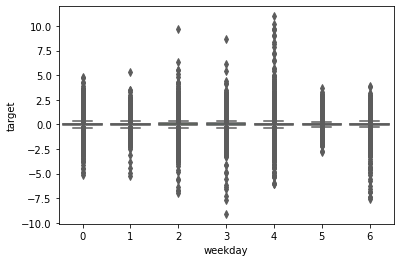

In [ ]:
# Dia com Close

sb.boxplot(x='weekday', y='target', data=df_full, palette='hls')

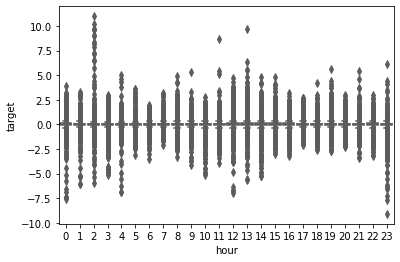

In [ ]:
# Hora com Close

sb.boxplot(x='hour', y='target', data=df_full, palette='hls')

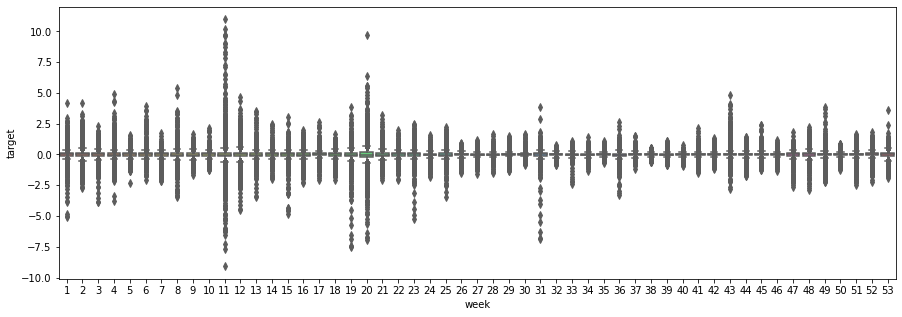

In [ ]:
# Semana com Close

fig3 = plt.figure(figsize=(15,5))
sb.boxplot(x='week', y='target', data=df_full, palette='hls')
plt.show()

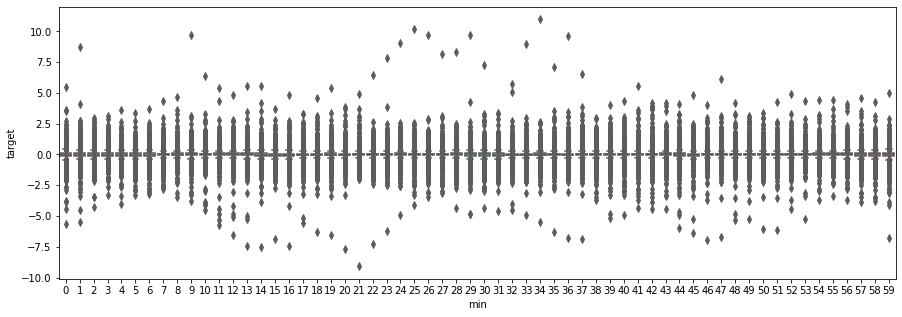

In [ ]:
# Minuto com Close

fig4 = plt.figure(figsize=(15,5))
sb.boxplot(x='min', y='target', data=df_full, palette='hls')
plt.show()

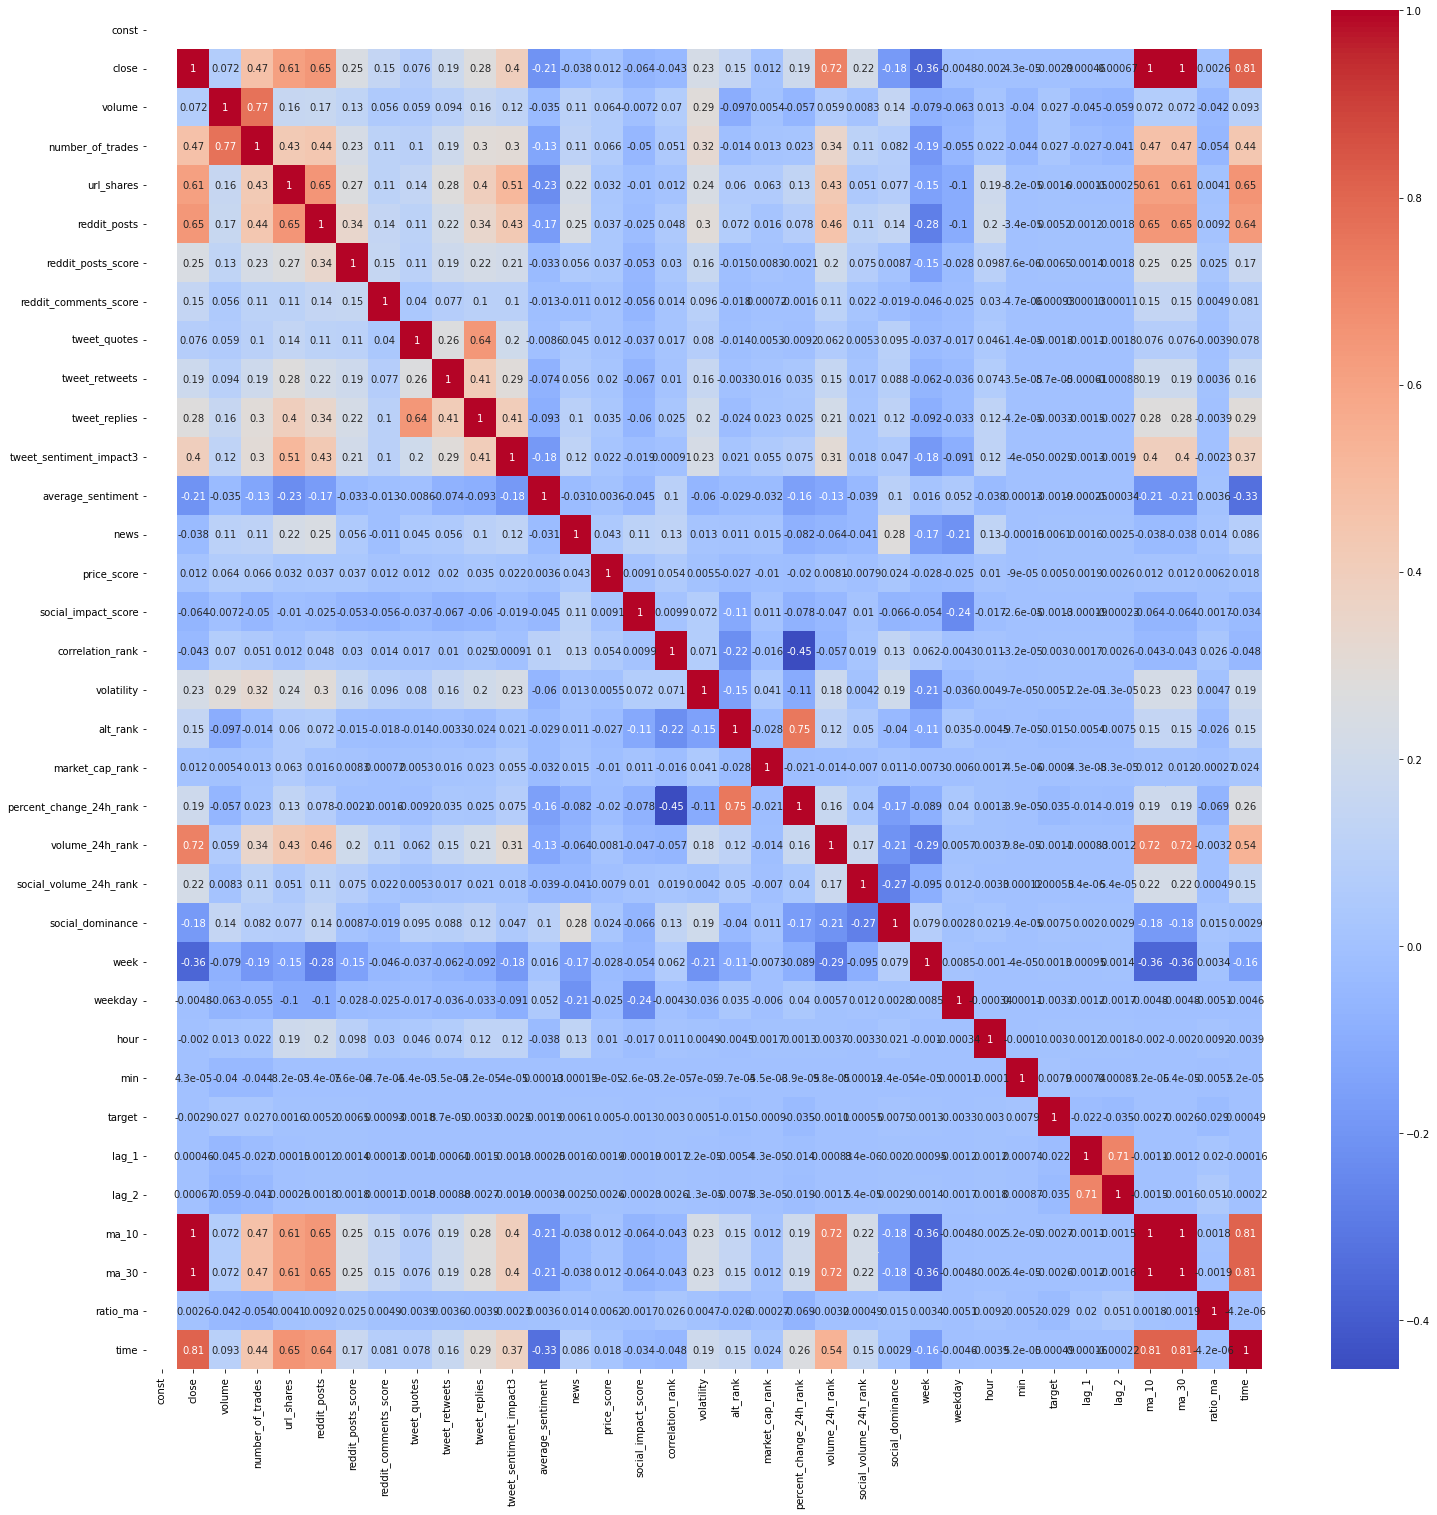

In [ ]:
# Última verificação do gráfico de correlações

fig5 = plt.figure(figsize=(25,25))
sns.heatmap(df_full.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')
plt.show()